In [2]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import cv2 as cv

# 均值移除

In [3]:
data=np.array([ [24,1,7000],[25,2,8000],[38,10,8500] ])
r=sp.scale(data)

r

array([[-0.78406256, -0.82760589, -1.33630621],
       [-0.62725005, -0.57932412,  0.26726124],
       [ 1.41131261,  1.40693001,  1.06904497]])

In [4]:
print(r.mean(axis=0),r.std(axis=0))

[0.00000000e+00 7.40148683e-17 5.18104078e-16] [1. 1. 1.]


# 范围缩放

In [5]:
mms=sp.MinMaxScaler(feature_range=(0,1))
r=mms.fit_transform(data)
r

array([[0.        , 0.        , 0.        ],
       [0.07142857, 0.11111111, 0.66666667],
       [1.        , 1.        , 1.        ]])

In [6]:
print(r.mean(axis=0),r.std(axis=0))

[0.35714286 0.37037037 0.55555556] [0.45550301 0.44752022 0.41573971]


# 二值化

In [7]:
bin=sp.Binarizer(threshold=127)
r=bin.fit_transform(data)
r

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [8]:
img = cv.imread("lily.jpg",0)
img

array([[37, 36, 35, ..., 54, 54, 51],
       [38, 38, 38, ..., 54, 53, 51],
       [40, 41, 40, ..., 52, 52, 51],
       ...,
       [ 5,  6,  6, ..., 72, 69, 68],
       [ 6,  6,  5, ..., 73, 72, 71],
       [ 6,  6,  5, ..., 70, 72, 74]], dtype=uint8)

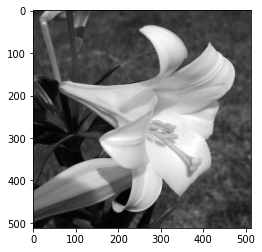

In [9]:
plt.imshow(img,cmap="gray")

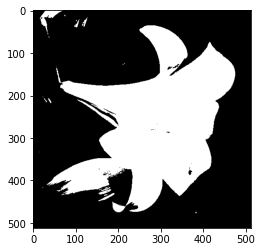

In [10]:
bin=sp.Binarizer(threshold=127)
r=bin.fit_transform(img)
plt.imshow(r,cmap="gray")

# 归一化

In [11]:
data2 = np.array([ [20,10,5],[4,2,1],[15,11,13] ])

In [12]:
r = sp.normalize(data2, norm="l1")
r

array([[0.57142857, 0.28571429, 0.14285714],
       [0.57142857, 0.28571429, 0.14285714],
       [0.38461538, 0.28205128, 0.33333333]])

In [13]:
np.abs(r).sum(axis=1)

array([1., 1., 1.])

In [14]:
r = sp.normalize(data2, norm="l2")
r

array([[0.87287156, 0.43643578, 0.21821789],
       [0.87287156, 0.43643578, 0.21821789],
       [0.66097897, 0.48471791, 0.57284844]])

In [15]:
(np.abs(r)**2).sum(axis=1)

array([1., 1., 1.])

# 独热编码

In [16]:
data3 = np.array([ [1,3,2],[7,5,4],[1,8,6],[7,3,9] ])
data3


array([[1, 3, 2],
       [7, 5, 4],
       [1, 8, 6],
       [7, 3, 9]])

<class 'scipy.sparse.csr.csr_matrix'>


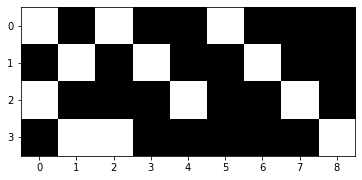

In [17]:
ohe= sp.OneHotEncoder()
t = ohe.fit_transform(data3)
print(type(t))
r=t.toarray()
r=r.astype("uint8")
r
plt.imshow(r,cmap="gray")


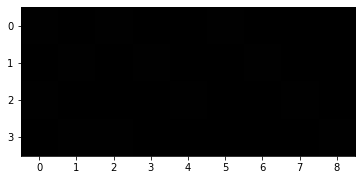

In [18]:
plt.imshow(r,vmax=255,cmap="gray")

# 线性回归

In [73]:
# x = np.array([0.5,0.6,0.8,1.1,1.4])
# y = np.array([5.0,5.5,6.0,6.8,7.0])


data=pd.read_csv("Salary_Data.csv",header=0)
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


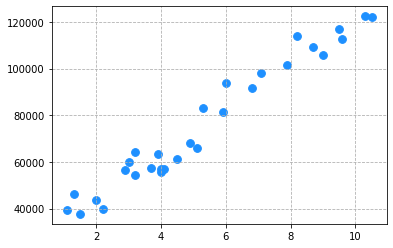

In [74]:
x=data[data.columns[0]]
y=data[data.columns[1]]

plt.grid(linestyle="--")
plt.scatter(x,y,s=60,color="dodgerblue",label="Samples")

In [75]:
#基于梯度下降的算法，不断更新w0与w1，从而找到最佳的模型参数
w0=0.5
w1=0.5

lrate=0.001 #学习率，超参数
times=1000

w0_set=[]
w1_set=[]
loss_set=[]
epoches=[]

for i in range(times):
    #输出每一轮运算过程中，w0，w1，loss的变化
    
    loss = np.sum(0.5*(w0+w1*x-y)**2)
    
    #存入各个列表中
    epoches.append(i+1)
    w0_set.append(w0)
    w1_set.append(w1)
    loss_set.append(loss)
    
#     print("{:4},w0:{:.8f},w1:{:.8f},loss:{:.8f}".format(i+1,w0,w1,loss))
    #计算w0与w1方向上的偏导数，带入模型参数的更新参数
    d0 = np.sum(w0 + x*w1 - y)
    d1 = np.sum(x**2*w1 + x*w0 - x*y)
    
    #更新w0，w1
    w0 += - lrate*d0
    w1 += - lrate*d1
    
    

w0,w1
loss = np.sum(0.5*(y-(w1*x+w0))**2)

print(w0,w1)
print(loss)

25751.174599695085 9456.050348585892
469069733.66238505


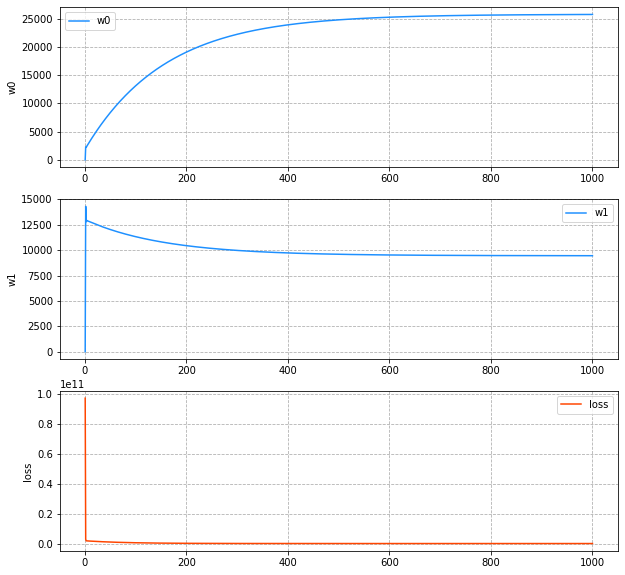

In [76]:
#超参数可视化

plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.grid(linestyle="--")
plt.ylabel("w0")
plt.plot(epoches,w0_set,color="dodgerblue",label="w0")
plt.legend()

plt.subplot(3,1,2)
plt.grid(linestyle="--")
plt.ylabel("w1")
plt.plot(epoches,w1_set,color="dodgerblue",label="w1")
plt.legend()

plt.subplot(3,1,3)
plt.grid(linestyle="--")
plt.ylabel("loss")
plt.plot(epoches,loss_set,color="orangered",label="loss")
plt.legend()


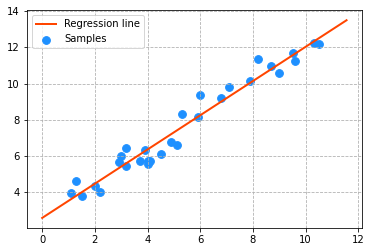

In [71]:
#绘制回归线
# x = np.array([0.5,0.6,0.8,1.1,1.4])
# y = np.array([5.0,5.5,6.0,6.8,7.0])
plt.grid(linestyle="--")
plt.scatter(x,y,s=60,color="dodgerblue",label="Samples")


x_check=np.linspace(0,x.max()*1.1,500)
y_check=w1*x_check + w0
plt.plot(x_check,y_check,color="orangered",linewidth=2,label="Regression line")
plt.legend()
plt.show()




In [22]:
def loss(w0,w1):
    return np.sum(0.5*(y-(w1*x+w0))**2)

In [23]:
def dw0_of_loss(w0,w1,bias):
    
    w0_bias = (1-bias)*w0
    
    v_ori = loss(w0,w1)
    v_bias = loss(w0_bias,w1)
    
    return (v_ori - v_bias)/bias
    
    

In [24]:
def dw1_of_loss(w0,w1,bias):
    
    w1_bias = (1-bias)*w1
    
    v_ori = loss(w0,w1)
    v_bias = loss(w0,w1_bias)
    
    return (v_ori - v_bias)/bias
    
    

In [26]:
x = np.array([0.5,0.6,0.8,1.1,1.4])
y = np.array([5.0,5.5,6.0,6.8,7.0])

#基于梯度下降的算法，不断更新w0与w1，从而找到最佳的模型参数
w0=1
w1=1

lrate=0.05 #学习率，超参数
times=1000

bias=0.001

for i in range(times):
    
    
    #计算w0与w1方向上的偏导数，带入模型参数的更新参数
    d0 = dw0_of_loss(w0,w1,bias)
    d1 = dw1_of_loss(w0,w1,bias)
    
    #更新w0，w1
    w0 += - lrate*d0
    w1 += - lrate*d1
    
    

w0,w1
loss = np.sum(0.5*(y-(w1*x+w0))**2)

print(w0,w1)
print(loss)


plt.grid(linestyle="--")
plt.scatter(x,y,s=60,color="dodgerblue",label="Samples")


x_check=np.linspace(0,2,500)
y_check=w1*x_check + w0
plt.plot(x_check,y_check,color="orangered",linewidth=2,label="Regression line")
plt.legend()
plt.show()

   1,w0:1.00000000,w1:1.00000000,loss:44.17500000


TypeError: 'numpy.float64' object is not callable